<center>
    
## <font color='maroon'>ASTR 21100/31200</font>
## <font color='maroon'>Computational techniques in astrophysics<br></font>
</center>

### Instructor: 
Andrey Kravtsov (email: <tt>kravtsov@uchicago.edu</tt>)
Professor,<br> Department of Astronomy & Astrophysics


### Teaching Assistants (for undergraduate students):  

Nathalie Chicoine (<tt>nchicoine@uchicago.edu</tt>), Diego Garza (<tt>diego2500garza@uchicago.edu</tt>), Alexandra Masegian (<tt>amasegian@uchicago.edu</tt>), Yue Pan (<tt>explorerpan@uchicago.edu</tt>), Aster Taylor (<tt>astertaylor@uchicago.edu</tt>)


### <font color='darkblue'>Numerical "integration" of motion of planets in the Gliese 876 exoplanet system 

Our goal for this week and for the 1st homework assignment is for you to learn the basics of how orbits are computed numerically and reproduce some cool motions of planets in an [exoplanet system Gliese 876](https://planet.fandom.com/wiki/Gliese_876) and results and figures of a paper by [Laughlin et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract). 
    
    
**Jupyter notebook with HW 1 assignment was distributed today. Your submission in the form of Jupyter notebook is due on Wednesday, Apr 6 by 10pm via Canvas.** 
    
<p>
<center>
<img width=700 src="https://vignette.wikia.nocookie.net/planetpedia/images/9/9a/Gliese_876_b.jpg/revision/latest/scale-to-width-down/2000?cb=20110512032028"></img>

### <font color='darkblue'>Office hours
    
    
* Thu, 5-7pm, ERC 517 - TAs + myself (via zoom)
    
    
* Fri, 1-3pm, ERC 517 - TAs
    
    
* Mon, 5-7pm, ERC 517 - TAs
    
    
* Wed, 5-7pm, ERC 545 - TAs


In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

### <font color='darkblue'>Equations governing motion of particles interacting gravitationally
        
Consider 2 particles interacting gravitationally. 
    
The first particle has "Cartesian" coordinates $x_1$, $y_1$, $z_1$ and velocity components $v_{x,1}$, $v_{y,1}$, $v_{z,1}$.     
    
Particle coordinates change as long as these velocity components are not zero; the rate of change is given by the definition of velocity:  
        
$$\frac{dx_1}{dt} = v_{x,1};\ \ \ \ \ \frac{dy_1}{dt} = v_{y,1};\ \ \ \ \  \frac{dz_1}{dt} = v_{z,1}.$$

This particle experiences gravitational force from the second particle, which changes its velocity components:  
    
$$\frac{dv_{x,1}}{dt}=a_{x,1};\ \ \ \ \frac{dv_{y,1}}{dt}=a_{y,1};\ \ \ \ \frac{dv_{z,1}}{dt}=a_{z,1},$$
    
where $a_{x,1}$, $a_{y,1}$, $a_{z,1}$ are components of the gravitational acceleration.
    

$$\vec{a}_1 = -G\,\frac{m_2}{r^3_{12}}\,\vec{r}_{21}=G\,\frac{m_2}{r^3_{12}}\,\vec{r}_{12},$$

or 
$$a_{x,1}=G\,\frac{m_2}{r^3_{12}}\,(x_{2}-x_{1}),$$

$$a_{y,1}=G\,\frac{m_2}{r^3_{12}}\,(y_{2}-y_{1}),$$

$$a_{z,1}=G\,\frac{m_2}{r^3_{12}}\,(z_{2}-z_{1}),$$
    
and where $r_{12}$ is the distance between the two particles: 
    
$$r_{12}=\left[(x_1-x_2)^2 + (y_1-y_2)^2 +(z_1-z_2)^2 \right]^{1/2}.$$
  

Equations for particle 2 are similar and can be obtained by switching indices 1 and 2 in the equations above. 

We start with the case of 2 particles both because it is simpler and because for this case, we know solution for orbits from a given initial condition exactly, which allows us to check our computations. We will then proceed to a general case of $N$ particles (see below). 

### <font color='darkblue'>"Integrating" these equations

By integrating equations of motion, we mean that solution of these equation, say particle positions as a function of time: $x_1(t)$, $x_2(t)$. 
    
However to get this solution from equation $dx_1/dt = v_{x,1}$, we need to know $v_{x,1}(t)$, but we don't know it in general. This solution needs to be obtained in parallel with obtaining $x_1(t)$, $x_2(t)$, ... because to solve for velocities we need accelerations and these depend on positions... 

### <font color='darkblue'>Numerical scheme for equations of motion 
    
equations are written for $x$ component only and would be similar for $y$ and $z$ components, acceleration is computed using positions at $t=t_n$. : 

$$t_{n+1} = t_n + \Delta t$$ 

$$x_{n+1} = x_{n}+ v_{x,n}\Delta t,\ \ \ \ y_{n+1}=\ldots$$

$$v_{x,n+1} = v_{x,n}+a_{x,n}\Delta t,\ \ \ \ v_{y,n+1}=\ldots$$


***Note:*** This is the simplest scheme called the ***1st order forward Euler scheme***. 

### <font color='darkblue'>Some relevant constants and quantities 

In [2]:
AU = 1.49598e+13 # 1 AU = average distance from the Earth to the Sun in centimeters (cm)
G = 6.67259e-08 # universal gravitational constant in cgs units 
yr =  3.15569e+07 # 1 year in seconds
msun = 1.9891e33 # mass of the Sun in grams
mearth = 5.9742e27 # mass of the Earth in grams
vcirc = (G*msun/AU)**0.5 # circular velocity = sqrt(G*Msun/AU)

### <font color='darkblue'> Initialize positions and velocities for a test: circular motion of the Earth around the Sun

In [262]:
x1, y1, z1 = 0., 0., 0. # coordinates of the Sun
x2, y2, z2 =  AU, 0., 0. # coordinates of the Earth 

vx1, vy1, vz1 = 0., 0., 0. # initial velocity of the Sun
vx2, vy2, vz2 = 0., vcirc, 0. # initial velocity of the Earth 

m1, m2 = msun, mearth # masses 


The code below implements the 1st order Euler scheme 

In [263]:
nsteps = 1000 # number of steps
dt =  10 * yr / nsteps # time step

x, y, z = [], [], [] # lists to record positions of the Earth during time steps  
for n in range(nsteps):
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    ax1 = G * m2 / r12**3 * (x2 - x1)
    ay1 = G * m2 / r12**3 * (y2 - y1)
    az1 = G * m2 / r12**3 * (z2 - z1)
    ax2 = G * m1 / r12**3 * (x1 - x2)
    ay2 = G * m1 / r12**3 * (y1 - y2)
    az2 = G * m1 / r12**3 * (z1 - z2)
    x1  = x1 + vx1 * dt 
    y1  = y1 + vy1 * dt 
    z1  = z1 + vz1 * dt 
    x2  = x2 + vx2 * dt 
    y2  = y2 + vy2 * dt 
    z2  = z2 + vz2 * dt 
    vx1 = vx1 + ax1 * dt 
    vy1 = vy1 + ay1 * dt 
    vz1 = vz1 + az1 * dt 
    vx2 = vx2 + ax2 * dt 
    vy2 = vy2 + ay2 * dt 
    vz2 = vz2 + az2 * dt 
    x.append(x2)
    y.append(y2)
    z.append(z2)
    
x, y, z = np.array(x)/AU, np.array(y)/AU, np.array(z)/AU

Using NumPy instead of lists to store coordinates of the 2nd particle (the Earth). 


In [84]:
nsteps = 1000 # number of steps
dt =  10 * yr / nsteps # time step

x, y, z = np.zeros(nsteps), np.empty(nsteps), np.empty(nsteps)
for n in range(nsteps):
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    ax1 = G * m2 / r12**3 * (x2 - x1)
    ay1 = G * m2 / r12**3 * (y2 - y1)
    az1 = G * m2 / r12**3 * (z2 - z1)
    ax2 = G * m1 / r12**3 * (x1 - x2)
    ay2 = G * m1 / r12**3 * (y1 - y2)
    az2 = G * m1 / r12**3 * (z1 - z2)
    x1  = x1 + vx1 * dt 
    y1  = y1 + vy1 * dt 
    z1  = z1 + vz1 * dt 
    x2  = x2 + vx2 * dt 
    y2  = y2 + vy2 * dt 
    z2  = z2 + vz2 * dt 
    vx1 = vx1 + ax1 * dt 
    vy1 = vy1 + ay1 * dt 
    vz1 = vz1 + az1 * dt 
    vx2 = vx2 + ax2 * dt 
    vy2 = vy2 + ay2 * dt 
    vz2 = vz2 + az2 * dt 
    x[n], y[n], z[n] = x2, y2, z2

x, y, z = x/AU, y/AU, z/AU

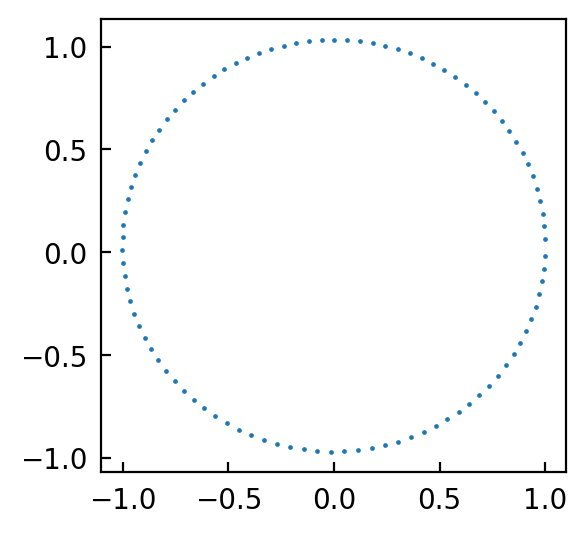

In [261]:
plt.figure(figsize=(3,3))
plt.scatter(x[:100],y[:100], s=0.5)
plt.show()

### <font color='darkblue'> Making multi-panel plots with Matplotlib 

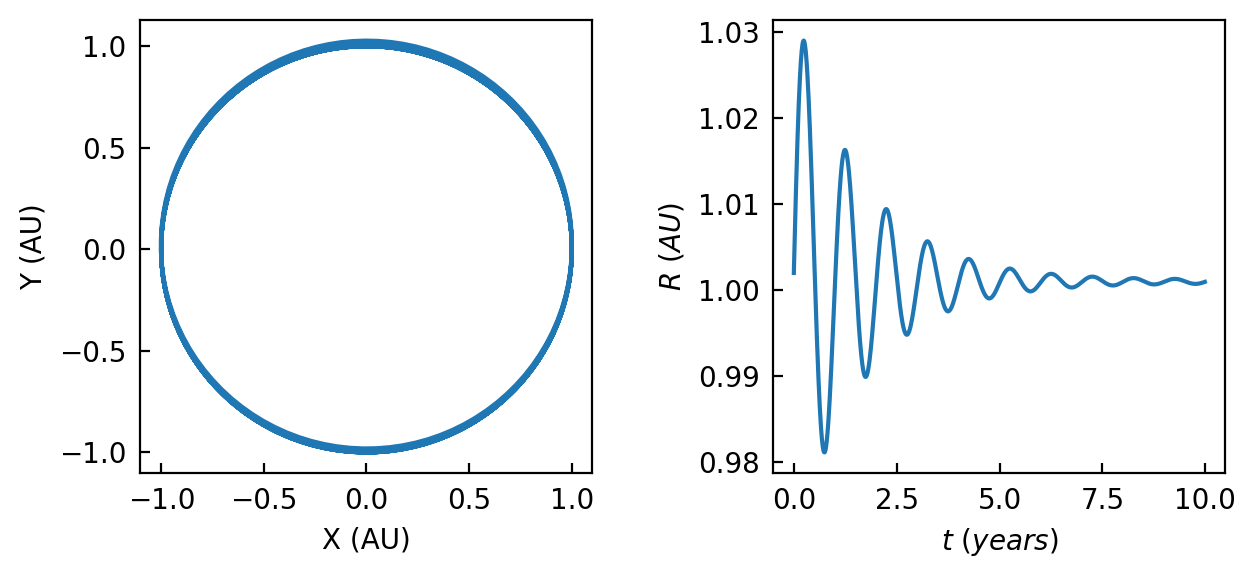

In [76]:
from codes.plotting import plot_prettier
plot_prettier()

fig, ax = plt.subplots(1, 2, figsize=(7,3)) # define sub-panels
fig.subplots_adjust(wspace=0.4)

r = (x**2 + y**2 + z**2)**0.5
ax[0].plot(x,y)
ax[0].set_ylabel('Y (AU)') # add labels to axes
ax[0].set_xlabel('X (AU)')
ax[1].plot(np.arange(nsteps)*dt/yr, r)
ax[1].set_xlabel('$t\ (years)$')
ax[1].set_ylabel('$R\ (AU)$')
plt.show()

### <font color='darkblue'>What's going on here? 

### <font color='darkblue'>1st order Kick-Drift (KD) scheme
    
equations are written for $x$ component only and would be similar for $y$ and $z$ components, acceleration is computed using positions at $t=t_n$. 
    
Compute acceleration using positions at $t_n$ and update velocity (**kick**). Then use the updated velocity to update positions (**drift**). 

**Kick:**
    
$$v_{x,n+1} = v_{x,n}+g_{x,n}\Delta t,\ \ \ \ v_{y,n+1}=\ldots$$

    
**Drift:**
    
$$x_{n+1} = x_{n}+ v_{x,n+1}\Delta t,\ \ \ \ y_{n+1}=\ldots$$

    
Below is the version implementing this scheme. It is only different from the Euler scheme by location of the velocity update


In [263]:
nsteps = 1000 # number of steps
dt =  10 * yr / nsteps # time step

x, y, z = [], [], [] # lists to record positions of the Earth during time steps  
for n in range(nsteps):
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    ax1 = G * m2 / r12**3 * (x2 - x1)
    ay1 = G * m2 / r12**3 * (y2 - y1)
    az1 = G * m2 / r12**3 * (z2 - z1)
    ax2 = G * m1 / r12**3 * (x1 - x2)
    ay2 = G * m1 / r12**3 * (y1 - y2)
    az2 = G * m1 / r12**3 * (z1 - z2)
    # kick
    vx1 = vx1 + ax1 * dt 
    vy1 = vy1 + ay1 * dt 
    vz1 = vz1 + az1 * dt 
    vx2 = vx2 + ax2 * dt 
    vy2 = vy2 + ay2 * dt 
    vz2 = vz2 + az2 * dt 
    # drift 
    x1  = x1 + vx1 * dt 
    y1  = y1 + vy1 * dt 
    z1  = z1 + vz1 * dt 
    x2  = x2 + vx2 * dt 
    y2  = y2 + vy2 * dt 
    z2  = z2 + vz2 * dt 
    x.append(x2)
    y.append(y2)
    z.append(z2)
    
x, y, z = np.array(x)/AU, np.array(y)/AU, np.array(z)/AU

### <font color='darkblue'>1st order Drift-Kick (DK) scheme
    
equations are written for $x$ component only and would be similar for $y$ and $z$ components, acceleration is computed using positions at $t=t_n$ and is used to update velocity to $t_{n+1}$ (**drift**). The new velocity is then used to update position to $t_{n+1}$ (**kick**). : 

    
**Drift:** 
    
$$x_{n+1} = x_{n}+ v_{x,n}\Delta t,\ \ \ \ y_{n+1}=\ldots$$

Compute acceleration using positions after drift (i.e. at $t_{n+1}$)
    
**Kick:** 
    
$$v_{x,n+1} = v_{x,n}+g_{x,n+1}\Delta t,\ \ \ \ v_{y,n+1}=\ldots$$




In [263]:
nsteps = 1000 # number of steps
dt =  10 * yr / nsteps # time step

x, y, z = [], [], [] # lists to record positions of the Earth during time steps  
for n in range(nsteps):
    # drift 
    x1  = x1 + vx1 * dt 
    y1  = y1 + vy1 * dt 
    z1  = z1 + vz1 * dt 
    x2  = x2 + vx2 * dt 
    y2  = y2 + vy2 * dt 
    z2  = z2 + vz2 * dt 
    # compute acceleration at t_{n+1}
    r12 = ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    ax1 = G * m2 / r12**3 * (x2 - x1)
    ay1 = G * m2 / r12**3 * (y2 - y1)
    az1 = G * m2 / r12**3 * (z2 - z1)
    ax2 = G * m1 / r12**3 * (x1 - x2)
    ay2 = G * m1 / r12**3 * (y1 - y2)
    az2 = G * m1 / r12**3 * (z1 - z2)
    # kick using new acceleration 
    vx1 = vx1 + ax1 * dt 
    vy1 = vy1 + ay1 * dt 
    vz1 = vz1 + az1 * dt 
    vx2 = vx2 + ax2 * dt 
    vy2 = vy2 + ay2 * dt 
    vz2 = vz2 + az2 * dt 
    x.append(x2)
    y.append(y2)
    z.append(z2)
    
x, y, z = np.array(x)/AU, np.array(y)/AU, np.array(z)/AU

***Note:*** the key feature of these schemes is that they don't update coordinates and velocities using accelerations at $t_n$. Rather, they update either coordinates or velocity components first to $t_{n+1}$ time, and then use the updated value to update the other quantity. 

Although as you saw, this only amounts to moving a few lines of code around this has dramatic effect on the accuracy of the calculation. 

The reason for this is that DK, KD, and other similar schemes, such as DKD, belong to o class of ***symplectic*** schemes, which happen to preserve a key property of physical systems - ***conservation of energy*** (roughly speaking). 

Although this material is advanced, for those of you who want to dive deeper into the origin of their superior performance, read Section 2.3.12 on pages 48-50 in these <a href="https://astro.uchicago.edu/~andrey/classes/a330/notes.pdf">notes</a>. 

### <font color='darkblue'>2nd order Drift-Kick-Drift (DKD) scheme 

\begin{eqnarray}
&D:& \ \ \vec{x}_{n+1/2} = \vec{x}_{n}+v_{n}\,\frac{\Delta t}{2},\\
&K:& \ \ \vec{v}_{n+1}=\vec{v}_n + \vec{g}_{n+1/2}\, \Delta t, \\
&D:& \ \ \vec{x}_{n+1} = \vec{x}_{n+1/2}+v_{n+1}\,\Delta t/2,\nonumber\\
\end{eqnarray}


Still uses only one acceleration evaluation per step, but requires initialization of positions or velocities half a step behind or forward. 

**Note:** the scheme is called "2nd order" because its *truncation error* $\epsilon_{\rm trunc}$ decreases as $\Delta t^3$ with decreasing $\Delta t$, compared to $\Delta t^3$ for the first order schemes. 

The overall error after many integration steps decreases as $\Delta t^2$ with decreasing $\Delta t$ for the 2nd order schemes, and as $\Delta t$ for the 1st order schemes. 



### <font color='darkblue'>DKD scheme is also called interchangeable either "leapfrog" or Verlet scheme

<img width=300 src="https://www.particleincell.com/wp-content/uploads/2010/11/pic_leapfrog.png"></img>

In practice, this scheme is employed with positions and momenta kept at different time slices, half a step from each other. The velocities and positions "leap-frog" each other, hence the name of the scheme: *leapfrog* integration (this scheme is also known as *the Verlet scheme* in Physics and molecular dynamics areas). 


### <font color='darkblue'> Symplectic DKD scheme is the most accurate scheme that uses only one acceleration calculation per time step
    


* More accurate schemes exist, but they require more calculations per step. 
    
    
* Step size control is also critical in some $N$-body integration problem, especially those that involve close encounters and strong gravitational interactions. Symplectic schemes for adaptive step sizes exist. 

### <font color='darkblue'>Integration of orbits of $N$ particles interacting gravitationally
    
    
Consider $N$ particles interacting gravitationally. We will label each particle with an index $i$ running from 0 to $N-1$. 
A particle with index $i$ has "Cartesian" coordinates $x_i$, $y_i$, $z_i$ and velocity components $v_{x,i}$, $v_{y,i}$, $v_{z,i}$. These are usually combined into *vectors* $\vec{r}_i=[x_i, y_i, z_i]$ and $\vec{v}_i=[v_{x,i}, v_{y,i}, v_{z,i}]$.
    
This particle is subject to gravitational forces from all other particles (except for itself): 
    
$$\frac{d\vec{r}_i}{dt} = \vec{v}_i;\ \ \ \ \frac{d\vec{v}_i}{dt}=\vec{g}_i\ \ \ i\in [0,N-1]$$

where $\vec{g}_i$ is vector of acceleration for a body at $\vec{r}_i$, which is determined by gravitational force from all the other bodies in the system:

$$\vec{g}_i=-G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,\vec{r}_{ij},$$
        
and where $\vec{r}_{ij}$ is the vector from location of body $i$ to body $j$ with magnitude given by the corresponding distance: 
    
$$r_{ij}=\left[(x_i-x_j)^2 + (y_i-y_j)^2 +(z_i-z_j)^2 \right]^{1/2}.$$
    

The same equations explicitly for each of the components are:
    
$$\frac{dx_i}{dt} = v_{x,i};\ \ \ \ \ \frac{dy_i}{dt} = v_{y,i};\ \ \ \ \  \frac{dz_i}{dt} = v_{z,i};$$

$$\frac{v_{x,i}}{dt}=g_{x,i}\ \ \ \ \frac{{v}_{y,i}}{dt}=g_{y,i}\ \ \ \ \frac{{v}_{z,i}}{dt}=g_{z,i}$$

The only thing that changes is that now we may have to deal with many particles, so writing code the way we did before will not work and accelerations have to computed by summation of forces from all other particles via a loop. 

$$g_{x,i}=G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,(x_{j}-x_{i}),$$

$$g_{y,i}=G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,(y_{j}-y_{i}),$$

$$g_{z,i}=G\sum\limits_{j=0,j\ne i}^{N-1} \frac{m_j}{r^3_{ij}}\,(z_{j}-z_{i}),$$


### <font color='darkblue'> Homework 1: Distributed today. Due next Wednesday, Apr 6, at 10pm.  
    
* 1. Write code to evolve $N$ gravitationally interacting particles and test it 

    
* 2. Apply it to model motion of star and 2 planets in the exoplanet system [exoplanet system Gliese 876](https://planet.fandom.com/wiki/Gliese_876) and results and figures of a paper by [Laughlin et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract).


<p>
<center>
<img width=700 src="https://vignette.wikia.nocookie.net/planetpedia/images/9/9a/Gliese_876_b.jpg/revision/latest/scale-to-width-down/2000?cb=20110512032028"></img>

### <font color='darkblue'> Namely, the goal is to reproduce these figures 

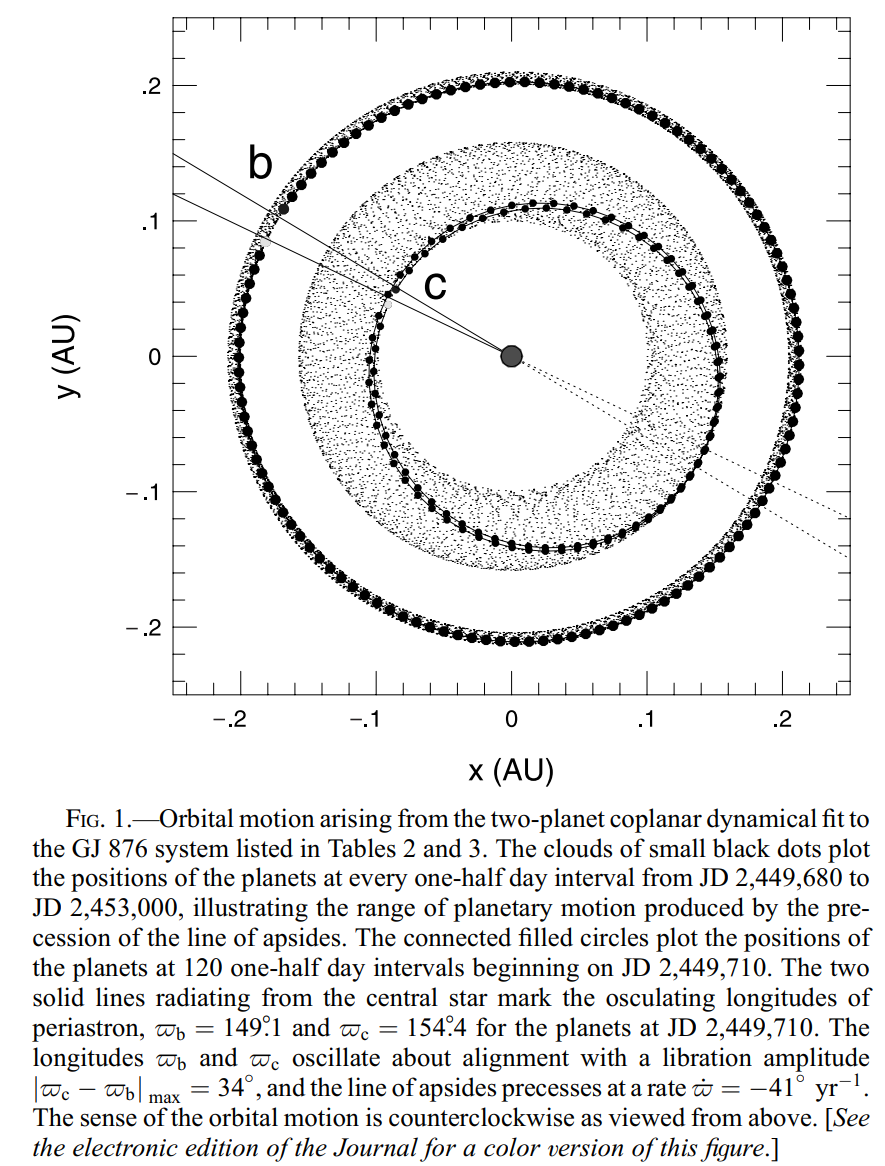

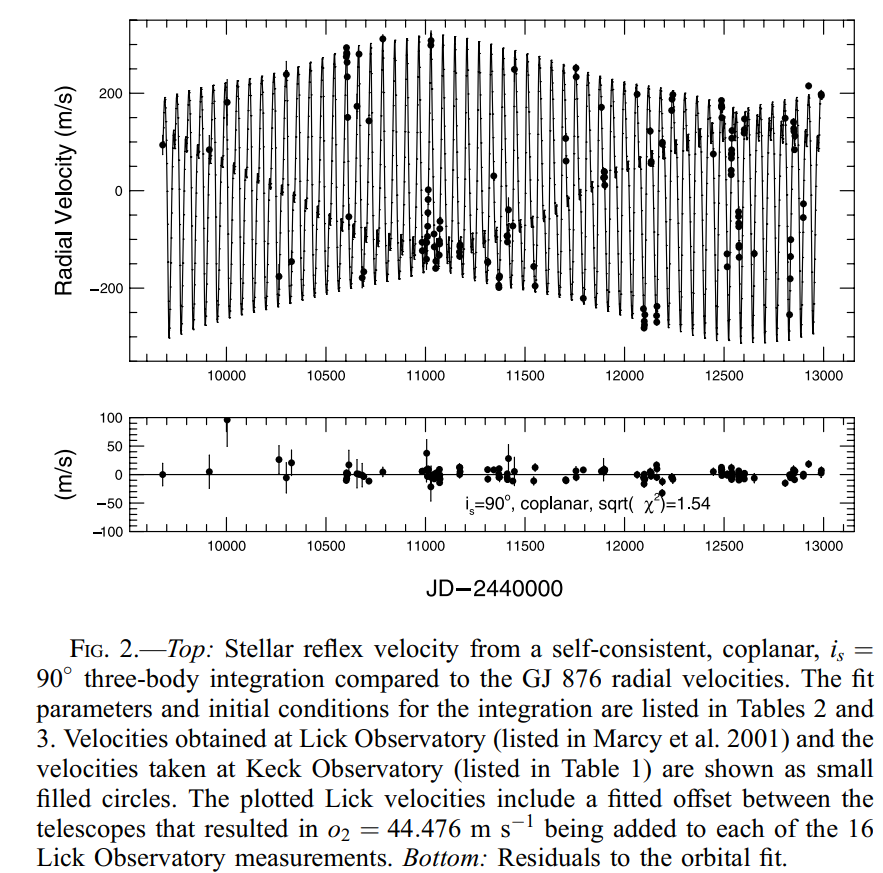

### <font color='darkblue'> Numerical integration

Example of how arrays for N particles can be initialized. In this case N=2 for a test of circular motion considered previously. 

In [266]:
N = 2
# the next 3 lines will work as initialization for any N
x = np.empty((N,3))
v = np.zeros_like(x)
m = np.empty(N)

# initialization with specific values is problem specific and so is specific to a given N value
# this is initialization for 2 particle test with the "Earth" on a circular orbit around the Sun
x[0,:] = 0., 0., 0. # coordinates of the Sun
x[1,:] =  AU, 0., 0. # coordinates of the Earth 

v[0,:] = 0., 0., 0. # initial velocity of the Sun
v[1,:] = 0., vcirc, 0. # initial velocity of the Earth 

m[:] = msun, mearth # masses 

The beauty of this is that this code will work for any $N$ (as long as arrays fit into available RAM). 

In [ ]:
nsteps = 100000 # number of steps
dt =  10 * yr / nsteps # time step


Below is an example of how stepping can be arrange for the Euler scheme. You should implement your own acceleration calculation in acc_func. 

In [224]:
nsteps = 100000 # number of steps
dt =  10 * yr / nsteps # time step

xt = np.zeros((nsteps,N,3))
vt = np.zeros_like(xt)
for n in range(nsteps):
    acc = acc_func(x, m)
    x = x + v * dt 
    v = v + acc * dt 
    xt[n] = x
    vt[n] = v
    
xt /= AU # convert x to AU


In [225]:
def acc_func(x, m):
    """
    x - numpy array of shape (N,3) containing coordinates of N particles in cm
    m - numpy 1d array of size N containing masses of particles in grams
    
    Returns
    accelerations in numpy array of shape (N,3)
    implement your own function here 
    
    """
    acc = np.empty_like(x)
    return acc

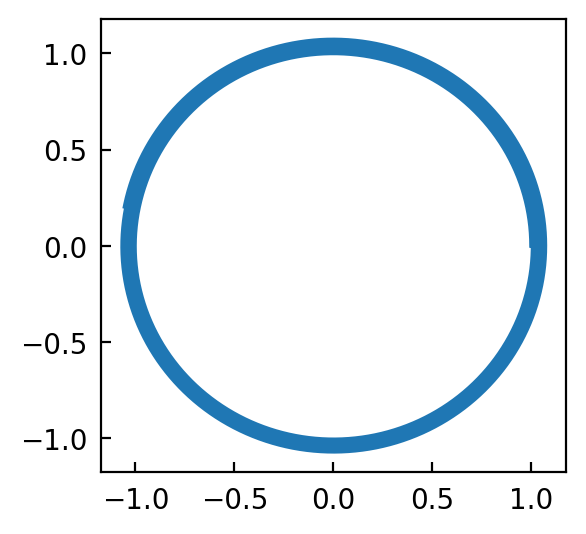

In [227]:


plt.figure(figsize=(3,3))
plt.plot(xt[:,1,0],xt[:,1,1])
plt.show()